# Project: 2DEG constriction
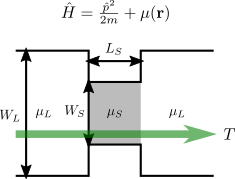
- Calculate the transmission coefficient trough a constriction in 2DEG.
- Perform calculations for different geometries.
- Recover the conductance quantization.
- Use a square lattice disretization for the whole system.
- Set  $\mu_L$  in such a manner that the number of open channels is high in the leads.
- Scan with  $\mu_S$

In [3]:
%pylab inline
from mezo import *
from ipywidgets import *

Populating the interactive namespace from numpy and matplotlib


C:\Users\Dani\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [148]:
# illustrate the study methode
def illustrate(Nx,Ny,Ntx,Nty,E0,E01,gamma,gamm2):
    X = range(Nx)
    Y = np.linspace(0,5,Ny)
    X1 = range(Nx,Ntx+Nx)
    Y1 = np.arange(Y[np.int((Ny-Nty)/2)],Y[np.int((Ny-Nty)/2)+Nty],Y[1]-Y[0])

    if E0 == E01:
        color_op = 'r'
    else:
        color_op = 'b'

    if gamma == gamma2:
        color_g = 'black'
    else:
        color_g = 'orange'


    plt.figure(figsize=((Y[1]-Y[0])*(Nx*2+Ntx-1),5))
    for i in X:
        plt.vlines(i,min(Y),max(Y),linewidth=20/Ny)
        plt.text(i,max(Y)+1/Ny,'$\epsilon_1$', ha='center', fontsize=110/(Ny))
        if len(X) != 1 and i < max(X):
            plt.text(i+(X[1]-X[0])/2,max(Y)-1/Ny*1.8,r'-$\gamma_1$', ha='center', fontsize=110/(Ny))
        for j in Y:
            plt.plot(i,j, 'o', c = 'r', markersize=70/Ny)
            if i == max(X):
                plt.hlines(j,min(X),max(X), linewidth=20/Ny)

    plt.text(max(X)+(X[1]-X[0])/2,max(Y1)-1/Ny*1.8,r'-$\gamma_2$', ha='center', fontsize=110/(Ny))
    for i in X1:
        plt.vlines(i,min(Y1),max(Y1),linewidth=20/Ny, color=color_g)
        plt.text(i,max(Y1)+1/Ny,'$\epsilon_2$', ha='center', fontsize=110/(Ny))
        if len(X1) != 1:
            plt.text(i+(X[1]-X[0])/2,max(Y1)-1/Ny*1.8,r'-$\gamma_2$', ha='center', fontsize=110/(Ny))
        for j in Y1:
            plt.plot(i,j, 'o', c = color_op, markersize=70/Ny) 
            if i == max(X1):
                plt.hlines(j,max(X),max(X1)+1, linewidth=20/Ny, color=color_g)

    for i in X:
        plt.vlines(max(X1)+1+i,min(Y),max(Y),linewidth=20/Ny)
        plt.text(max(X1)+1+i,max(Y)+1/Ny,'$\epsilon_1$', ha='center', fontsize=110/(Ny))
        if len(X) != 1 and i < max(X):
            plt.text(max(X1)+(X[1]-X[0])+i+(X[1]-X[0])/2,max(Y)-1/Ny*1.8,r'-$\gamma_1$', ha='center', fontsize=110/(Ny))
        for j in Y:
            plt.plot(max(X1)+1+i,j, 'o', c = 'r', markersize=70/Ny)
            if i == max(X):
                plt.hlines(j,max(X1)+1+min(X),max(X1)+1+max(X), linewidth=20/Ny)
    
    plt.arrow(Nx,0,0,(Y[1]-Y[0])*(Ny-Nty)/4, head_width = 0.9/Ny, width=0.05/Ny, color='black')
    plt.text(Nx+1/Ny,(Y[1]-Y[0])*(Ny-Nty)/4, 'y',fontsize=110/(Ny))
    plt.arrow(Nx,0,(X[1]-X[0])*Ntx/3,0, head_width = 0.9/Ny, width=0.05/Ny, head_length=0.9/Ny, color='black')
    plt.text(Nx+(X[1]-X[0])*Ntx/3,1/Ny, 'x',fontsize=110/(Ny))
    
    plt.text((X[1]-X[0])*np.int(Nx/2),-1, 'I.',fontsize=200/(Ny), ha = 'center')
    plt.text((X[1]-X[0])*(Nx+np.int(Ntx/2)),-1, 'II.',fontsize=200/(Ny), ha = 'center')
    plt.text((X[1]-X[0])*(Nx+Ntx+np.int(Nx/2)),-1, 'III.',fontsize=200/(Ny), ha = 'center')


    plt.title('2DEG constriction sample',pad = 9, fontsize=20)        
    plt.axis('off')
    plt.show()

# I first studied the structure of the transport system 
- Enter example parameters for the scatering sample, used a square lattice disretization

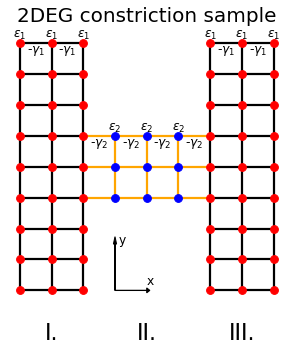

In [150]:
# number of onsite potentials in x direxction, int!
Nx = 3
# number of onsite potentials in y direxction, int! (W_L)
Ny = 9
# onsite potetials value
E0 = 0
# onsite potetials value in the tunnel
E01 = 1
# hopping value
gamma = 1 


# tunnel: number of o.p. y (W_s)
Nty = 3
#tunnel: number of o.p. x (L_s)
Ntx = 3
# hopping value
gamma2 = 0.5


# illustrate the sample
illustrate(Nx,Ny,Ntx,Nty,E0,E01,gamma,gamma2)

The sample can be divided into three main parts. The Hamiltonian matrix for each of these can be determined by specifying $H_0$ and $H_1$, as shown below.

\begin{equation}
H_0 =
\begin{pmatrix}
    \epsilon_0 & -\gamma & 0 & . & . & .\\
    -\gamma & \epsilon_0 & -\gamma & 0 & & \\
    0 & -\gamma & \epsilon_0 & -\gamma & & \\
    . & 0 & -\gamma & . & &  \\
    . & & & &.& \\
    . & & & & &. \\
\end{pmatrix}
\end{equation}

\begin{equation}
H_1 =
\begin{pmatrix}
    -\gamma & 0 & . & . & . & \\
    0 & -\gamma & 0 & & & \\
    . & 0& -\gamma & 0 & & \\
    . &  & 0 & . & &  \\
    . & & & &.& \\
     & & & & &. \\
\end{pmatrix}
\end{equation}

\begin{equation}
    \Downarrow
\end{equation}

\begin{equation}
H =
\begin{pmatrix}
    H_0 & H_1 & . & . & . & \\
    H_1 & H_0 & H_1 & & & \\
    . & H_1& H_0 & H_1 & & \\
    . &  & H_1 & . & &  \\
    . & & & &.& \\
     & & & & &. \\
\end{pmatrix}
\end{equation}

The dimension of the matrix $H_0$ and $H_1$ depends on the number of on-site potentials in the selected direction, in this case in the y direction.

## Build first the Hamiltonians of the parts 

- ### $H_I$ and $H_{III}$

In parts I. and III., the matrices $H_0$ and $H_1$ are the same, so it is enough to determine this once.

In [154]:
num_hop_y = np.ones(Ny-1,int)
num_pot_y = np.ones(Ny,int)

t = -np.diag(num_hop_y, 1)
h = t + t.T
h = h*gamma # hoppings
e = np.diag(num_pot_y, 0)
e = e*E0 # onsite potentials
H0 = e + h
print('H0:')
H0

H0:


array([[ 0, -1,  0,  0,  0,  0,  0,  0,  0],
       [-1,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0]])

In [155]:
t_ = np.eye(Nx) # num of o.p. in x direction
T = np.kron(t_,H0) # all o.p. in system I
p = -np.diag(num_pot_y)
H1 = p*gamma # H1
num_hop_x= np.ones(Nx-1,int)
p_ = np.diag(num_hop_x,1)
P = np.kron(p_,H1) # all hoppings in x direction
# The Hamiltonian:
H = (P+T) + P.T
print('H1:')
H1

H1:


array([[-1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1]])

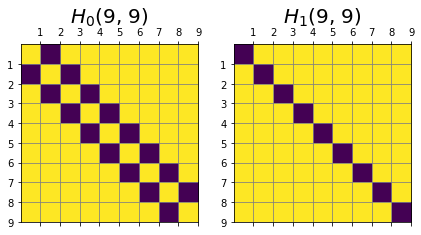

In [156]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(1,2,1)
ax.matshow(H0)
ax.set_title('$H_{0} $' + str(H0.shape), pad=12, fontsize=20)

ax.set_xticks(0.5+np.arange(Ny))
ax.set_xticklabels(np.arange(Ny)+1)
ax.set_yticks(0.5+np.arange(Ny))
ax.set_yticklabels(np.arange(Ny)+1)
ax.grid(color='gray')

ax1 = fig.add_subplot(1,2,2)
ax1.matshow(H1)
ax1.set_title('$H_{1} $' + str(H1.shape), pad=12, fontsize=20)

ax1.set_xticks(0.5+np.arange(Ny))
ax1.set_xticklabels(np.arange(Ny)+1)
ax1.set_yticks(0.5+np.arange(Ny))
ax1.set_yticklabels(np.arange(Ny)+1)
ax1.grid(color='gray')

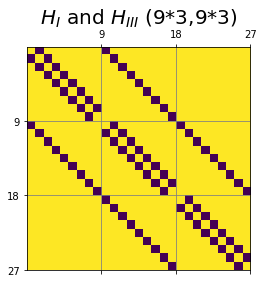

In [157]:
plt.matshow(H)
plt.title('$H_I$ and $H_{III}$ (' + str(H0.shape[0]) +'*' +str(Nx) + ','+ str(H0.shape[0]) +'*' +str(Nx) + ')' , pad=12, fontsize=20)

plt.xticks(0.5+np.arange(Ny,Nx*Ny+1, Ny)-1, labels=np.arange(Ny,Nx*Ny+1, Ny))
plt.yticks(0.5+np.arange(Ny,Nx*Ny+1, Ny)-1, labels=np.arange(Ny,Nx*Ny+1, Ny))
plt.grid(color='gray')
plt.show()

- ### $H_{II}$

The dimension of the matrix $H_0$ and $H_1$ in part 2 is the same as in the other two parts, but their elements are zero in several places where there is no on-site potential for the "tunnel".

In [158]:
num_hop_y_tun = np.ones(Nty-1,int)
num_pot_y_tun = np.ones(Nty,int)

y0_tunnel = np.int((Ny-Nty)/2)
num_hop_y_tun = np.concatenate((np.zeros(y0_tunnel,int), num_hop_y_tun, np.zeros((Ny-Nty)-y0_tunnel,int)))
num_pot_y_tun = np.concatenate((np.zeros(y0_tunnel,int), num_pot_y_tun, np.zeros((Ny-Nty)-y0_tunnel,int)))

In [159]:
t2 = -np.diag(num_hop_y_tun, 1)
h2 = t2 + t2.T
h2 = h2*gamma2 # hoppings
e2 = np.diag(num_pot_y_tun, 0)
e2 = e2*E0 # onsite potentials
H02 = e2 + h2
print('H0:')
H02

H0:


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -2,  0,  0,  0,  0],
       [ 0,  0,  0, -2,  0, -2,  0,  0,  0],
       [ 0,  0,  0,  0, -2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [160]:
t2_ = np.eye(Ntx) # num of o.p. in x direction (Real Ntx)
T2 = np.kron(t2_,H02) # all o.p. in system II
p2 = -np.diag(num_pot_y_tun)
H12 = p2*gamma2 # H1
num_hop_x_tun= np.ones(Ntx-1,int)
p2_ = np.diag(num_hop_x_tun,1)
P2 = np.kron(p2_,H12) # all hoppings in x direction
# The Hamiltonian:
H2 = (P2+T2) + P2.T
print('H1:')
H12

H1:


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

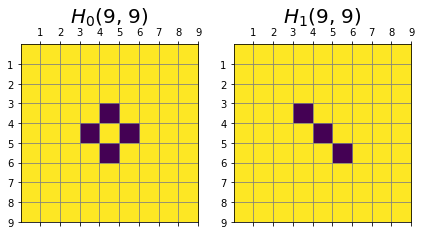

In [161]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(1,2,1)
ax.matshow(H02)
ax.set_title('$H_{0} $' + str(H0.shape), pad=12, fontsize=20)

ax.set_xticks(0.5+np.arange(Ny))
ax.set_xticklabels(np.arange(Ny)+1)
ax.set_yticks(0.5+np.arange(Ny))
ax.set_yticklabels(np.arange(Ny)+1)
ax.grid(color='gray')

ax1 = fig.add_subplot(1,2,2)
ax1.matshow(H12)
ax1.set_title('$H_{1} $' + str(H1.shape), pad=12, fontsize=20)

ax1.set_xticks(0.5+np.arange(Ny))
ax1.set_xticklabels(np.arange(Ny)+1)
ax1.set_yticks(0.5+np.arange(Ny))
ax1.set_yticklabels(np.arange(Ny)+1)
ax1.grid(color='gray')

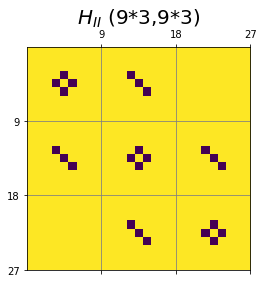

In [162]:
plt.matshow(H2)
plt.title('$H_{II}$ (' + str(H02.shape[0]) +'*' +str(Ntx) + ','+ str(H02.shape[0]) +'*' +str(Ntx) + ')' , pad=12, fontsize=20)

plt.xticks(0.5+np.arange(Ny,(Ntx)*Ny+1, Ny)-1, labels=np.arange(Ny,(Ntx)*Ny+1, Ny))
plt.yticks(0.5+np.arange(Ny,(Ntx)*Ny+1, Ny)-1, labels=np.arange(Ny,(Ntx)*Ny+1, Ny))
plt.grid(color='gray')

plt.show() # missing the hopping between HI-HII and HII-HIII

## Build the Hamiltonian of the system 

In [163]:
Z1 = np.zeros((H.shape[0], H2.shape[1]),dtype=int)
Z2 = np.zeros(H.shape,dtype=int)
Ts = np.asarray(np.bmat([[H,Z1,Z2],[Z1.T,H2,Z1.T], [Z1,Z2,H]])) # H0 for the hall system


P_c = np.zeros((Nx*2+Ntx,Nx*2+Ntx),int) # hopping between I, III and II
P_c[Nx-1,Nx] = 1
P_c[(P_c.shape[0]-Nx-1), (P_c.shape[1]-Nx)] = 1

P_c1 = np.kron(P_c,H12)

H_all = (P_c1 + Ts) + P_c1.T

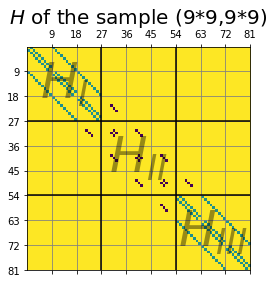

In [164]:
plt.matshow(H_all)
plt.title('$H$ of the sample (' + str(H0.shape[0]) +'*' +str(Nx*2+Ntx) + ','+ str(H02.shape[0]) +'*' +str(Nx*2+Ntx) + ')' , pad=12, fontsize=20)

plt.xticks(0.5+np.arange(Ny,(Ntx+Nx*2)*Ny+1, Ny)-1, labels=np.arange(Ny,(Ntx+Nx*2)*Ny+1, Ny))
plt.yticks(0.5+np.arange(Ny,(Ntx+Nx*2)*Ny+1, Ny)-1, labels=np.arange(Ny,(Ntx+Nx*2)*Ny+1, Ny))

a = 0
for i in np.array([H.shape[0],H2.shape[0]]):
    a += i
    plt.hlines(a-0.5,-0.5,(Ntx+Nx*2)*Ny-0.5)
    plt.vlines(a-0.5,-0.5,(Ntx+Nx*2)*Ny-0.5)
plt.grid(color='gray')

plt.text(Ny*Nx/2-0.5,Ny*Nx/2-0.5,'$H_I$', ha ='center', va='center', fontsize=50, alpha=0.4)
plt.text(Ny*Nx+Ny*Ntx/2-0.5,Ny*Nx+Ny*Ntx/2-0.5,'$H_{II}$', ha ='center', va='center', fontsize=50, alpha=0.4)
plt.text(Ny*Nx+Ny*Ntx+Ny*Nx/2-0.5,Ny*Nx+Ny*Ntx+Ny*Nx/2-0.5,'$H_{III}$', ha ='center', va='center', fontsize=50, alpha=0.4)

plt.show()

When creating the Hamiltonia of the sample, care have to be taken to ensure a proper hopping between the Hamiltonian of the parts.

### Added semi-infinite leads to the system

First I calculated the Green function of the sample.

\begin{equation}
    G_{sample} = (E\cdot I - H_{sample})^{-1}
\end{equation}
Where $I$  is identical matrix and $E$ is an energy parameter. \
Use $G_{sample}$ and the Green's functions of the semi-infinite leads, $G^l_l$, $G^r_l$ (from mezo package) I could build the decoupled Green's function of the system.
\begin{equation}
G_{dc} =
\begin{pmatrix}
    G^l_l& & \\
    & G^r_l & \\
    &  & G_{sample} \\
\end{pmatrix}
\end{equation}
I calculated the actual Green function with the Dyson's equation:
\begin{equation}
    G = (G_{cd}^{-1}-V)^{-1}
\end{equation}
Where V is the coupling matrix (between the leads and the sample).
\begin{equation}
V =
\begin{pmatrix}
    \underline{\underline{0}} & & H_1 & &\\
    & \underline{\underline{0}} & & &H_1\\
    H_1& & & & \\
    & & &\underline{\underline{0}} & \\
    & H_1& & & \\
\end{pmatrix}
\end{equation}

From the Green's function the transmission element, transmission amplitudo of the scattering matrix can be calculated, $t = S_ {2,1}$. The transmission coefficient: T = |$t \cdot t^{H}$|

\begin{equation}
    S_{\alpha_p,\beta_q} = <\tilde{\alpha}^-_p|G_{\alpha|_0,\beta|_0}\nu_{\beta}-\delta_{\alpha,\beta}|\beta_q^+>\sqrt{\frac{|v_p^{\alpha-}|}{|v_q^{\beta+}|}}
\end{equation}
Where $ \alpha, \beta $ are the indices of the leads and $p, q$ are the indices of the cahenels in the leads. (+ toward the scatter range, -  from the scatter range ). The quantities $v_n^{\mu},\ |\mu_n>,\ <\tilde{\mu}_p|,\ \nu$ can be found in the note http://oroszl.web.elte.hu/mezo/OL_lecture_notes-1.pdf

In [379]:
def Two_DEG_const(E0,E01,gamma,gamma2,Nx,Ny,Ntx,Nty,ene):
    
    if Ntx < 3:
        return(print('Ntx must be >/= 3!'))
        
    if Ny < Nty:
        return(print('Nty must be </= Ny!'))
    
    else:
    
        # H0, H1 and H of the I and III part
        num_hop_y = np.ones(Ny-1,int)
        num_pot_y = np.ones(Ny,int)

        t = -np.diag(num_hop_y, 1)
        h = t + t.T
        h = h*gamma # hoppings
        e = np.diag(num_pot_y, 0)
        e = e*E0 # onsite potentials
        H0 = e + h

        t_ = np.eye(Nx) # num of o.p. in x direction
        T = np.kron(t_,H0) # all o.p. in system I
        p = -np.diag(num_pot_y)
        H1 = p*gamma # H1
        num_hop_x= np.ones(Nx-1,int)
        p_ = np.diag(num_hop_x,1)
        P = np.kron(p_,H1) # all hoppings in x direction
        # The Hamiltonian:
        H = (P+T) + P.T


        # H0, H1 and H of the II part

        num_hop_y_tun = np.ones(Nty-1,int)
        num_pot_y_tun = np.ones(Nty,int)

        y0_tunnel = np.int((Ny-Nty)/2)
        num_hop_y_tun = np.concatenate((np.zeros(y0_tunnel,int), num_hop_y_tun, np.zeros((Ny-Nty)-y0_tunnel,int)))
        num_pot_y_tun = np.concatenate((np.zeros(y0_tunnel,int), num_pot_y_tun, np.zeros((Ny-Nty)-y0_tunnel,int)))

        t2 = -np.diag(num_hop_y_tun, 1)
        h2 = t2 + t2.T
        h2 = h2*gamma2 # hoppings
        e2 = np.diag(num_pot_y_tun, 0)
        e2 = e2*E01 # onsite potentials
        H02 = e2 + h2

        t2_ = np.eye(Ntx-2) # num of o.p. in x direction (Real Ntx)
        T2 = np.kron(t2_,H02) # all o.p. in system II
        p2 = -np.diag(num_pot_y_tun)
        H12 = p2*gamma2 # H1
        num_hop_x_tun= np.ones(Ntx-3,int)
        p2_ = np.diag(num_hop_x_tun,1)
        P2 = np.kron(p2_,H12) # all hoppings in x direction
        # The Hamiltonian:
        H2 = (P2+T2) + P2.T



        # The total Hamiltonian of the sample

        Z1 = np.zeros((H.shape[0], H2.shape[1]),dtype=int)
        Z2 = np.zeros(H.shape,dtype=int)
        Ts = np.asarray(np.bmat([[H,Z1,Z2],[Z1.T,H2,Z1.T], [Z1,Z2,H]])) # H0 for the hall system


        P_c = np.zeros((Nx*2+Ntx-2,Nx*2+Ntx-2),int) # hopping between I, III and II
        P_c[Nx-1,Nx] = 1
        P_c[(P_c.shape[0]-Nx-1), (P_c.shape[1]-Nx)] = 1

        P_c1 = np.kron(P_c,H12)

        H_all = (P_c1 + Ts) + P_c1.T

        # Green function
        # energy parameter
        E = np.eye(H_all.shape[0]) # energy value of the all oneside potential 
        E = E*ene

        g0s = np.linalg.inv(E-H_all) # green function of the sample

        # semi-infinite leads
        L_l = lead(H0,H1) 
        L_r = lead(H0,H1)
        L_l.set_ene(ene)
        L_r.set_ene(ene)

        # Green's function of decoupled system:
        Zg = np.zeros((L_l.gsL.shape[0],g0s.shape[1]),dtype=int)
        Zg2 = np.zeros(L_l.gsL.shape,dtype=int)

        G_dc = np.asarray(np.bmat([[L_l.gsL, Zg, Zg2], 
                              [Zg2, L_r.gsR, Zg],
                              [Zg.T, Zg.T, g0s]])) 

        # Connection matrix
        Zg3 = np.zeros((L_l.gsL.shape[0], g0s.shape[1]-L_l.gsL.shape[1]),dtype=int)
        Zg4 = np.zeros((2*L_l.gsL.shape[0], 2*L_l.gsL.shape[0]),dtype=int)

        Zero_sample = np.zeros((g0s.shape), int)

        v = np.asarray(np.bmat([[-L_r.H1,Zg3],
                                [Zg3,-L_l.H1]]))

        V = np.asarray(np.bmat([[Zg4,v],
                                [v.T,Zero_sample]]))

        #Dyson's equation
        G = np.linalg.inv(np.linalg.inv(G_dc)-V) # Green function of the system

        dim = L_r.gsL.shape[0]

        t=matrix(diag(sqrt(abs(L_r.vg_right_open))))*L_r.vec_right_dual_open*    \
        G[dim:2*dim,:dim]*L_l.V*                                    \
        L_l.vec_right_open*matrix(diag(1/sqrt(abs(L_l.vg_right_open))))

        return trace(t*t.H)

In [380]:
# Generate transmission , the example construction
erange=linspace(-10,10,300)
TR=[]

for E in erange:
    TR.append(Two_DEG_const(E0,E01,gamma,gamma2,Nx,Ny,Ntx,Nty,E))
kran=linspace(-pi,pi,1000)

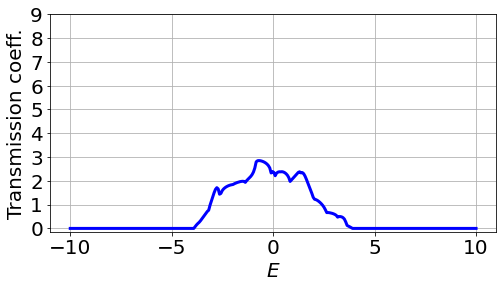

In [381]:
plot(erange,real(TR),lw=3,color='blue')
xticks(linspace(-10,10,5),fontsize=20);
xlabel(r'$E$',fontsize=20)
ylabel('Transmission coeff.',fontsize=20)
yticks(linspace(0,Ny,Ny+1),fontsize=20)
grid()

- Transmission coefficient for different geometries

In [568]:
# parameters
Ny = 9
Nx = 2
epsilon = 0
epsilon1 = 0
gamma = 1
gamma2 = 1
Nty = np.arange(9,2,-2)
Ntx = 5


erange=linspace(-10,10,300)
TR_l = []
for i in Nty:
    TR1=[]
    for E in erange:
        TR1.append(Two_DEG_const(epsilon,epsilon1,gamma,gamma2,Nx,Ny,Ntx,i,E))
    TR_l.append(TR1)

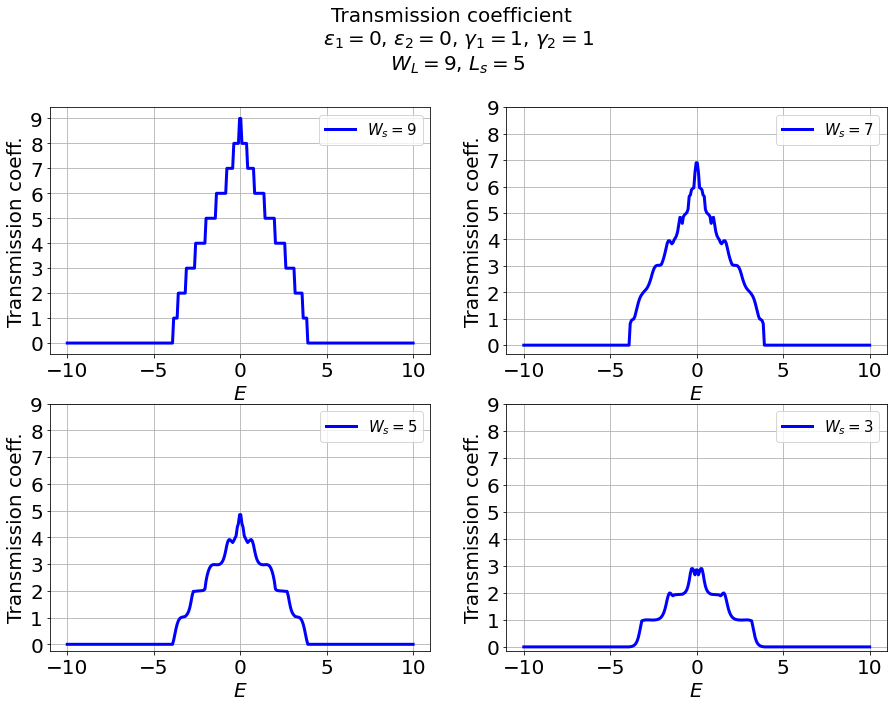

In [567]:
fig = plt.figure(figsize=(15,10))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plot(erange,real(TR_l[i]),label = '$W_s=$' + str(Nty[i]), lw=3, color='blue')
    xticks(linspace(-10,10,5),fontsize=20);
    xlabel(r'$E$',fontsize=20)
    ylabel('Transmission coeff.',fontsize=20)
    yticks(linspace(0,Ny,Ny+1),fontsize=20)
    plt.legend(fontsize=15)
    grid()
plt.suptitle('Transmission coefficient \n $\epsilon_1=$' + str(epsilon) + ', $\epsilon_2=$' + str(epsilon1) \
             + ', $\gamma_1 = $' + str(gamma) + ', $\gamma_2 = $' + str(gamma2) + '\n' \
             + ' $W_L = $' + str(Ny)+ ', $L_s = $' + str(Ntx), y=1.02, fontsize=20)
plt.show()

In [569]:
# parameters
Ny = 9
Nx = 2
epsilon = 0
epsilon1 = 0
gamma = 1
gamma2 = 1
Nty = np.arange(9,2,-2)
Ntx = 5
E_state = 0.01

erange1=linspace(0,1,100)
TR_gamma2 = []
for i in Nty:
    TR1=[]
    for E in erange1:
        TR1.append(Two_DEG_const(epsilon,epsilon1,gamma,E,Nx,Ny,Ntx,i,E_state))
    TR_gamma2.append(TR1)

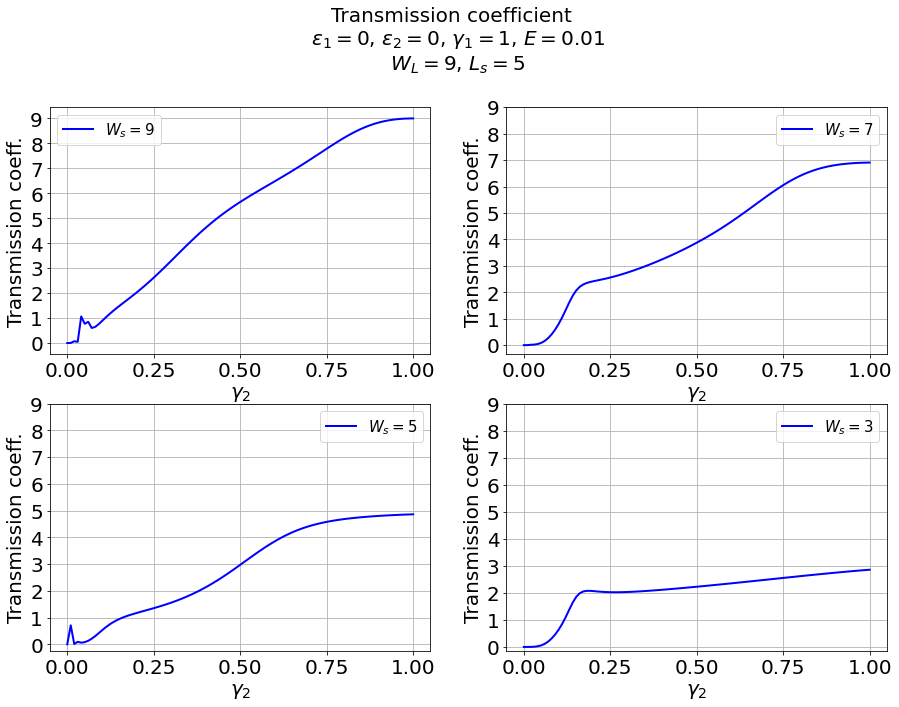

In [570]:
fig = plt.figure(figsize=(15,10))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plot(erange1,real(TR_gamma2[i]),label = '$W_s=$' + str(Nty[i]), lw=2, color='blue')
    xticks(linspace(0,1,5),fontsize=20);
    xlabel(r'$\gamma_2$',fontsize=20)
    ylabel('Transmission coeff.',fontsize=20)
    yticks(linspace(0,Ny,Ny+1),fontsize=20)
    plt.legend(fontsize=15)
    grid()
plt.suptitle('Transmission coefficient \n $\epsilon_1=$' + str(epsilon) + ', $\epsilon_2=$' + str(epsilon1) \
             + ', $\gamma_1 = $' + str(gamma) + ', $E = $' + str(E_state) + '\n' \
             + ' $W_L = $' + str(Ny)+ ', $L_s = $' + str(Ntx), y=1.02, fontsize=20)
plt.show()

In [592]:
# parameters
Ny = 9
Nx = 2
epsilon = 1
epsilon1 = 0
gamma = 1
gamma2 = 1
Nty = np.arange(9,2,-2)
Ntx = 5
E_state = 0.01

erange1=linspace(-5,5,100)
TR_eps2 = []
for i in Nty:
    TR1=[]
    for E in erange1:
        TR1.append(Two_DEG_const(epsilon,E,gamma,gamma2,Nx,Ny,Ntx,i,E_state))
    TR_eps2.append(TR1)

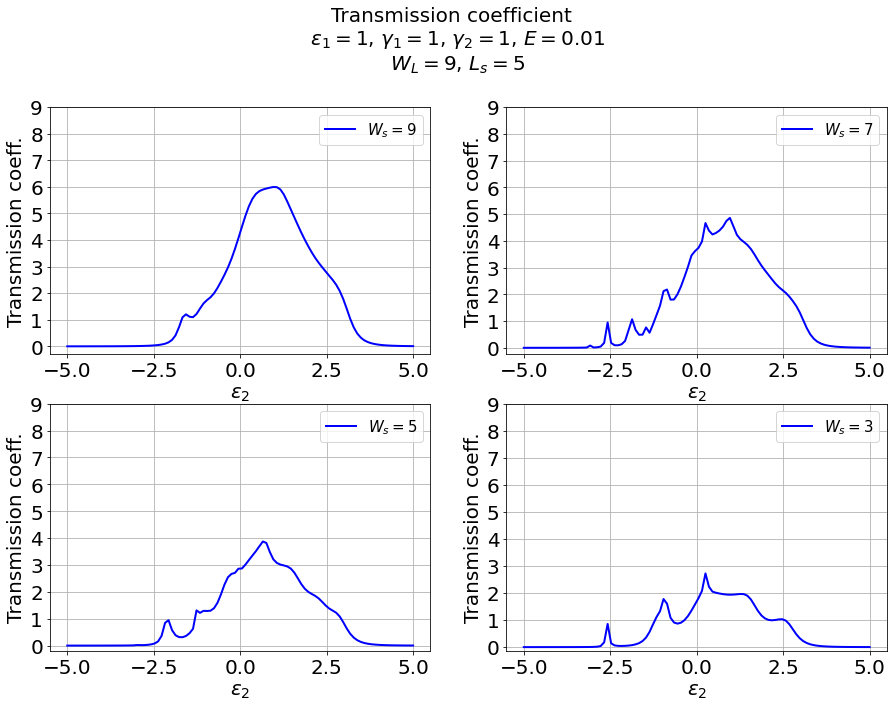

In [593]:
fig = plt.figure(figsize=(15,10))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plot(erange1,real(TR_eps2[i]),label = '$W_s=$' + str(Nty[i]), lw=2, color='blue')
    xticks(linspace(-5,5,5),fontsize=20);
    xlabel(r'$\epsilon_2$',fontsize=20)
    ylabel('Transmission coeff.',fontsize=20)
    yticks(linspace(0,Ny,Ny+1),fontsize=20)
    plt.legend(fontsize=15)
    grid()
plt.suptitle('Transmission coefficient \n $\epsilon_1=$' + str(epsilon)   \
             + ', $\gamma_1 = $' + str(gamma) + ', $\gamma_2 = $' + str(gamma2) + ', $E = $' + str(E_state) + '\n' \
             + ' $W_L = $' + str(Ny)+ ', $L_s = $' + str(Ntx), y=1.02, fontsize=20)
plt.show()